In [28]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
df = pd.read_csv("H3Units.csv")
df = df.drop(columns = 'Additional_item')
df["Total_Cost"] = df.Gold * df.Growth
df.head(5)

,Unit_name,Castle,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Special_abilities,Total_Cost
0,Pikeman,Castle,1,4,5,1,3,10,4,14,80,60,Immunetojousting,840
1,Halberdier,Castle,1+,6,5,2,3,10,5,14,115,75,Immunetojousting,1050
2,Archer,Castle,2,6,3,2,3,10,4,9,126,100,Ranged(12shots),900
3,Marksman,Castle,2+,6,3,2,3,10,6,9,184,150,"Ranged(24shots),Doubleattack",1350
4,Griffin,Castle,3,8,8,3,6,25,6,7,351,200,"Flying,Tworetaliations",1400


Index(['Castle', 'Conflux', 'Dungeon', 'Fortress', 'Inferno', 'Necropolis',
       'Neutral', 'Rampart', 'Stronghold', 'Tower'],
      dtype='object', name='Castle')

In [29]:
df_sum_values = df.copy()
df_sum_values['Mean Damage'] = (df_sum_values['Maximum Damage'] + df_sum_values['Minimum Damage'])/2
df_sum_values=df_sum_values.groupby(df_sum_values.Castle).sum()
df_sum_values = df_sum_values.drop(columns = ['Minimum Damage','Maximum Damage'])
df_sum_values

,Attack,Defence,Health,Speed,Growth,AI_Value,Gold,Total_Cost,Mean Damage
Castle,,,,,,,,,
Castle,166,155,870,103,80,21383,12575,24970,199.0
Conflux,150,141,771,118,90,18271,7955,25750,152.5
Dungeon,163,150,878,105,78,20794,11050,23765,187.0
Fortress,139,163,861,93,78,17111,10280,23145,168.0
Inferno,162,150,789,111,76,19906,11780,23180,174.0
Necropolis,151,139,813,95,74,16753,10295,23460,175.0
Neutral,242,219,3335,134,88,169375,78700,88950,290.5
Rampart,153,145,898,104,80,20841,10355,22325,187.0
Stronghold,160,120,885,91,82,16163,8995,20615,176.5


In [82]:
# it's a function to show which castle has the best (Attack, Defence, Health - column names) 
def show_the_best_castle(cols, palette):
  plt.figure(figsize=(17,7))
  title = f'The sum of units {str(cols)} in different castles'
  sns.set(font_scale=1.5)
  sns.barplot(x=df_sum_values.sort_values(cols).index,y=df_sum_values.sort_values(cols)[cols],  palette=palette).set_title(title)

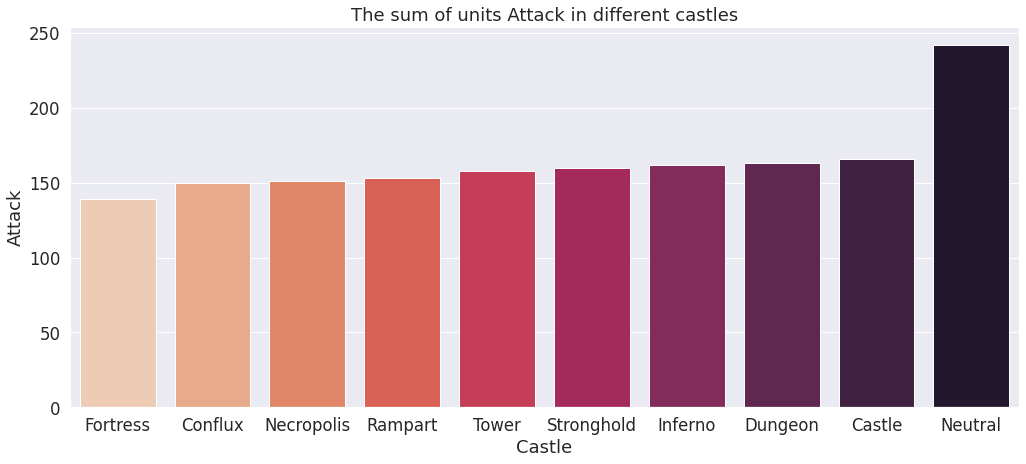

In [83]:
 show_the_best_castle("Attack", "rocket_r")

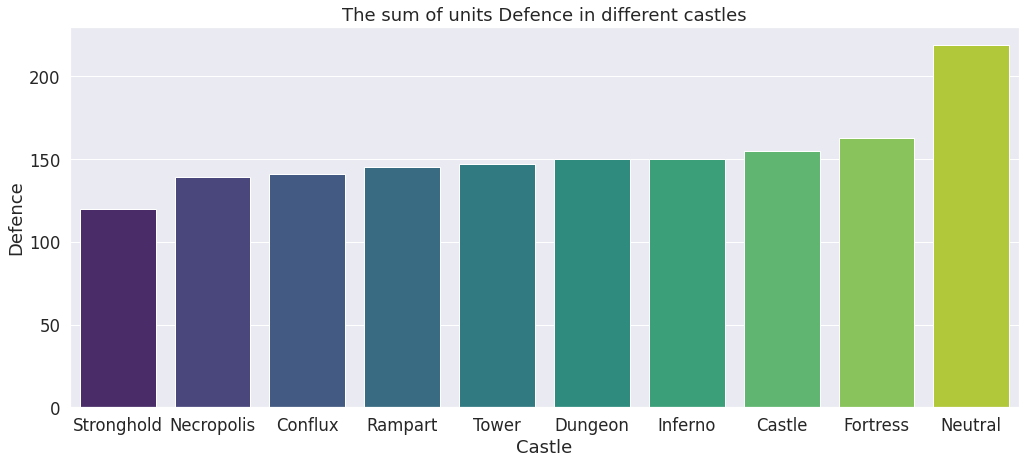

In [84]:
 show_the_best_castle("Defence", "viridis")

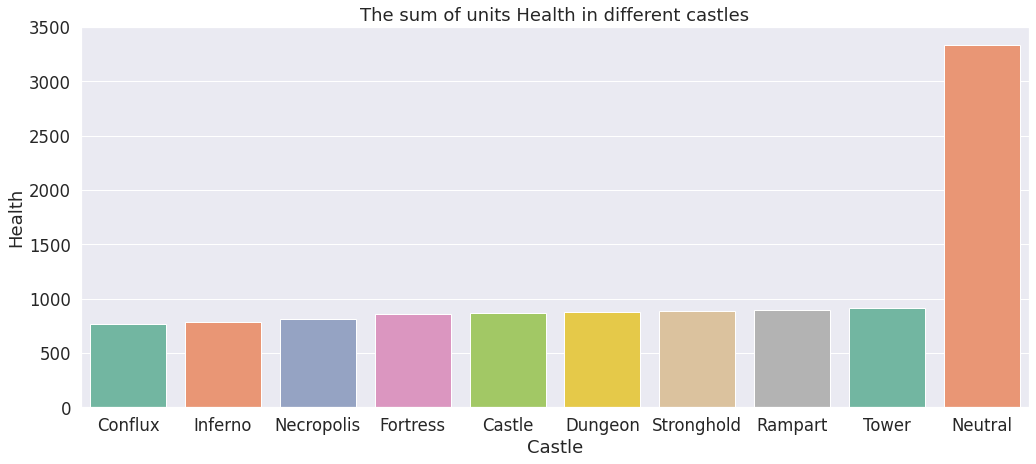

In [88]:
show_the_best_castle("Health", "Set2")

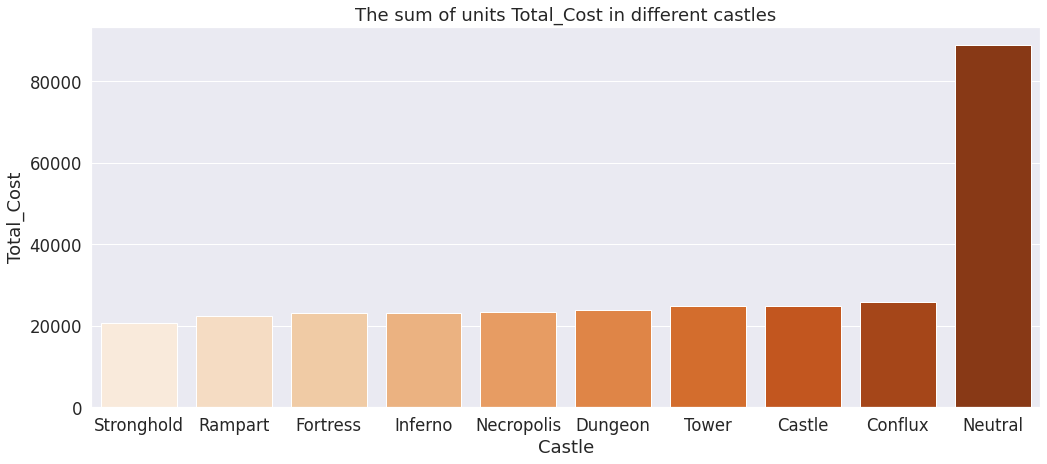

In [90]:
show_the_best_castle("Total_Cost", "Oranges")

In [110]:
dragon = df.loc[df["Unit_name"].str.contains("Dragon") & df["Growth"] == 1]
dragon = dragon.sort_values("Gold")
dragon

Text(0.5, 1.0, 'Cost of a dragon')

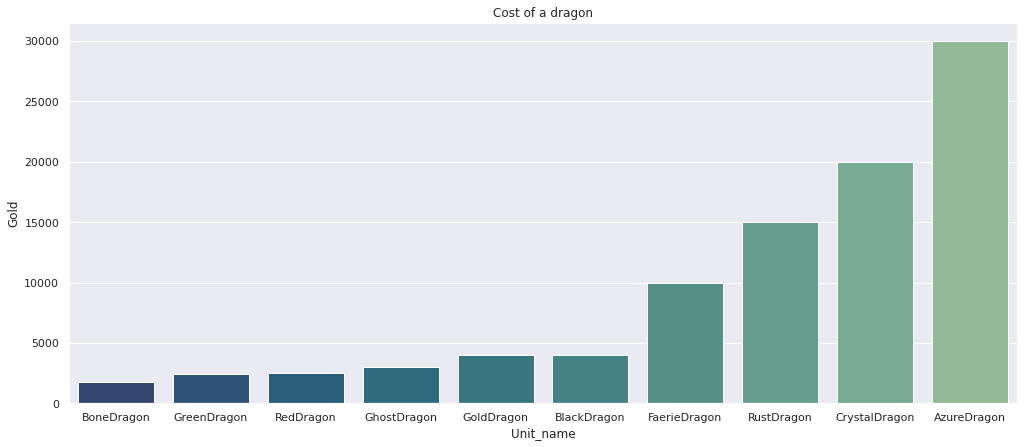

In [111]:
plt.figure(figsize=(17,7))
title = "Cost of a dragon"
sns.set(font_scale=1)
sns.barplot(x=dragon['Unit_name'],y=dragon['Gold'],  palette='crest_r').set_title(title)

In [101]:
df_flying_units = df.loc[df["Special_abilities"].str.contains("Flying") ]
df_flying_units = df_flying_units.groupby(['Castle'], as_index=False).count()
df_flying_units

,Castle,Unit_name,Level,Attack,Defence,Minimum Damage,Maximum Damage,Health,Speed,Growth,AI_Value,Gold,Special_abilities,Total_Cost
0,Castle,4,4,4,4,4,4,4,4,4,4,4,4,4
1,Conflux,5,5,5,5,5,5,5,5,5,5,5,5,5
2,Dungeon,6,6,6,6,6,6,6,6,6,6,6,6,6
3,Fortress,4,4,4,4,4,4,4,4,4,4,4,4,4
4,Inferno,2,2,2,2,2,2,2,2,2,2,2,2,2
5,Necropolis,6,6,6,6,6,6,6,6,6,6,6,6,6
6,Neutral,3,3,3,3,3,3,3,3,3,3,3,3,3
7,Rampart,4,4,4,4,4,4,4,4,4,4,4,4,4
8,Stronghold,2,2,2,2,2,2,2,2,2,2,2,2,2
9,Tower,4,4,4,4,4,4,4,4,4,4,4,4,4


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe60e90a790>],
      dtype=object)

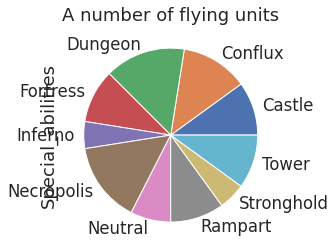

In [104]:
plt.title("A number of flying units")
df_flying_units.set_index(df_flying_units['Castle'], inplace=True)
df_flying_units['Special_abilities'].plot(kind='pie', subplots=True )